<a href="https://colab.research.google.com/github/wli-dvl/amazon-ecommerce-data-analysis-1/blob/main/Car_Air_Freshener_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_df = pd.read_csv('Car Air Freshener Helium 10 Export.csv')

In [ ]:
raw_df.head()

,Display Order,Product Details,ASIN,URL,Image URL,Brand,Price $,Parent Level Sales,ASIN Sales,Recent Purchases,...,Size Tier,Fulfillment,Dimensions,Weight,ABA Most Clicked,Creation Date,Sponsored,Best Seller,Seller Age (mo),Seller
0,1.0,Vilicci Tobacco Vanilla Car Air Freshener – Pr...,B08KP31SZQ,https://www.amazon.com/dp/B08KP31SZQ?psc=1,https://m.media-amazon.com/images/I/91dru8RrNH...,Vilicci,15.99,"1,499",652,600,...,Large Standard-Size,FBA,3.98 x 1.22 x 1.26 in,0.07,NaN,"Dec 13, 2020",Sponsored Brand,No,54.0,Hour Loop
1,2.0,Vilicci Pharaoh in a Tie Car Air Freshener | L...,B08DFJRB67,https://www.amazon.com/dp/B08DFJRB67?psc=1,https://m.media-amazon.com/images/I/915xyv99Kf...,Vilicci,15.99,"1,535",151,100,...,Large Standard-Size,FBA,3.86 x 1.26 x 1.26 in,0.09,NaN,"Oct 1, 2020",Sponsored Brand,No,56.0,Hour Loop
2,3.0,Vilicci Fallen Angel Car Air Freshener – Long ...,B08CGGKTJ1,https://www.amazon.com/dp/B08CGGKTJ1?psc=1,https://m.media-amazon.com/images/I/91oMtRAQIc...,Vilicci,15.99,"1,535",198,100,...,Large Standard-Size,FBA,4.02 x 1.18 x 1.26 in,0.09,NaN,"Jul 6, 2020",Sponsored Brand,No,59.0,Hour Loop
3,4.0,($) Pura Car Diffuser Starter Set - Smart Car ...,B0CPTCV2JS,https://www.amazon.com/dp/B0CPTCV2JS?psc=1,https://m.media-amazon.com/images/I/71P0vWcWs6...,Pura,49.98,605,605,500,...,Large Standard-Size,FBA,6.89 x 4.02 x 6.30 in,0.79,NaN,"Dec 8, 2023",Sponsored,No,18.0,Pattern.
4,5.0,($) AromaPlan Natural luxurious Room Spray & C...,B0D887324C,https://www.amazon.com/dp/B0D887324C?psc=1,https://m.media-amazon.com/images/I/61OhlMn1+W...,AROMAPLAN,35.40,26,3,NaN,...,Large Standard-Size,FBA,6.77 x 2.72 x 6.42 in,1.30,NaN,"Jun 27, 2024",Sponsored,No,12.0,AromaPlan


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Display Order          74 non-null     float64
 1   Product Details        74 non-null     object 
 2   ASIN                   74 non-null     object 
 3   URL                    74 non-null     object 
 4   Image URL              74 non-null     object 
 5   Brand                  74 non-null     object 
 6   Price  $               74 non-null     float64
 7   Parent Level Sales     74 non-null     object 
 8   ASIN Sales             74 non-null     object 
 9   Recent Purchases       62 non-null     object 
 10  Parent Level Revenue   74 non-null     object 
 11  ASIN Revenue           74 non-null     object 
 12  Title Char. Count      74 non-null     int64  
 13  BSR                    71 non-null     object 
 14  Seller Country/Region  73 non-null     object 
 15  Fees  $ 

In [ ]:
excluded_columns = ['Display Order', 'Image URL', 'Parent Level Sales','Parent Level Revenue','Dimensions','Weight','ABA Most Clicked','Creation Date']
filtered_df = raw_df.drop(columns=excluded_columns)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product Details        74 non-null     object 
 1   ASIN                   74 non-null     object 
 2   URL                    74 non-null     object 
 3   Brand                  74 non-null     object 
 4   Price  $               74 non-null     float64
 5   ASIN Sales             74 non-null     object 
 6   Recent Purchases       62 non-null     object 
 7   ASIN Revenue           74 non-null     object 
 8   Title Char. Count      74 non-null     int64  
 9   BSR                    71 non-null     object 
 10  Seller Country/Region  73 non-null     object 
 11  Fees  $                73 non-null     float64
 12  Active Sellers         74 non-null     int64  
 13  Ratings                72 non-null     float64
 14  Review Count           74 non-null     object 
 15  Images  

In [ ]:
columns_to_convert = ['ASIN Sales', 'Recent Purchases', 'ASIN Revenue', 'BSR', 'Review Count', 'Review velocity']

for column in columns_to_convert:
  # Replace 'N/A' with np.nan (NaN represents null in pandas)
  filtered_df[column] = filtered_df[column].replace('N/A', np.nan)
  # Remove commas from the string values
  filtered_df[column] = filtered_df[column].astype(str).str.replace(',', '', regex=False)
  # Convert to float, coercing errors to NaN
  filtered_df[column] = pd.to_numeric(filtered_df[column], errors='coerce')

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product Details        74 non-null     object 
 1   ASIN                   74 non-null     object 
 2   URL                    74 non-null     object 
 3   Brand                  74 non-null     object 
 4   Price  $               74 non-null     float64
 5   ASIN Sales             74 non-null     int64  
 6   Recent Purchases       62 non-null     float64
 7   ASIN Revenue           74 non-null     float64
 8   Title Char. Count      74 non-null     int64  
 9   BSR                    71 non-null     float64
 10  Seller Country/Region  73 non-null     object 
 11  Fees  $                73 non-null     float64
 12  Active Sellers         74 non-null     int64  
 13  Ratings                72 non-null     float64
 14  Review Count           74 non-null     int64  
 15  Images  

In [ ]:
# Fill empty 'Category' with 'Unknown'
filtered_df['Category'].fillna('Unknown', inplace=True)

# Group by 'Category' and sum 'ASIN Revenue'
category_revenue = filtered_df.groupby('Category')['ASIN Revenue'].sum().reset_index()

# Print the result
category_revenue

ASIN Revenue Aggregation by Category:


/tmp/ipython-input-12-1711669159.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df['Category'].fillna('Unknown', inplace=True)


,Category,ASIN Revenue
0,Air Freshener Sprays,78575.35
1,Automobile Aroma Diffusers,8012.79
2,Automotive,913748.37
3,Automotive Air Fresheners,1214717.67
4,Dog Odor Removers,24768.09
5,Unknown,281943.55


In [ ]:
filtered_df = filtered_df[filtered_df['Category'].isin(['Automotive Air Fresheners', 'Automotive'])]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 68
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product Details        45 non-null     object 
 1   ASIN                   45 non-null     object 
 2   URL                    45 non-null     object 
 3   Brand                  45 non-null     object 
 4   Price  $               45 non-null     float64
 5   ASIN Sales             45 non-null     int64  
 6   Recent Purchases       43 non-null     float64
 7   ASIN Revenue           45 non-null     float64
 8   Title Char. Count      45 non-null     int64  
 9   BSR                    45 non-null     float64
 10  Seller Country/Region  44 non-null     object 
 11  Fees  $                45 non-null     float64
 12  Active Sellers         45 non-null     int64  
 13  Ratings                45 non-null     float64
 14  Review Count           45 non-null     int64  
 15  Images       

In [ ]:
filtered_df.describe()

,Price $,ASIN Sales,Recent Purchases,ASIN Revenue,Title Char. Count,BSR,Fees $,Active Sellers,Ratings,Review Count,Images,Review velocity,Seller Age (mo)
count,45.000000,45.000000,43.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,41.000000,45.000000
mean,15.008000,3740.200000,3260.465116,47299.245333,125.733333,43.688889,5.856667,5.155556,4.264444,6560.333333,6.688889,220.634146,70.377778
std,6.680859,3861.728626,2988.879352,47123.030921,41.754368,28.561594,1.603106,5.842460,0.244164,9724.008007,2.429199,664.430198,59.312841
min,3.970000,17.000000,100.000000,220.960000,52.000000,2.000000,2.770000,1.000000,3.600000,159.000000,2.000000,0.000000,5.000000
25%,9.990000,992.000000,900.000000,14764.360000,91.000000,21.000000,4.580000,1.000000,4.100000,1420.000000,6.000000,26.000000,24.000000
50%,12.950000,2942.000000,3000.000000,35184.360000,133.000000,36.000000,5.830000,3.000000,4.300000,2264.000000,7.000000,57.000000,56.000000
75%,17.420000,5084.000000,5000.000000,61551.310000,159.000000,66.000000,6.480000,7.000000,4.500000,8377.000000,8.000000,213.000000,111.000000
max,36.990000,16422.000000,10000.000000,220215.100000,195.000000,100.000000,9.280000,24.000000,4.600000,51451.000000,16.000000,4248.000000,255.000000


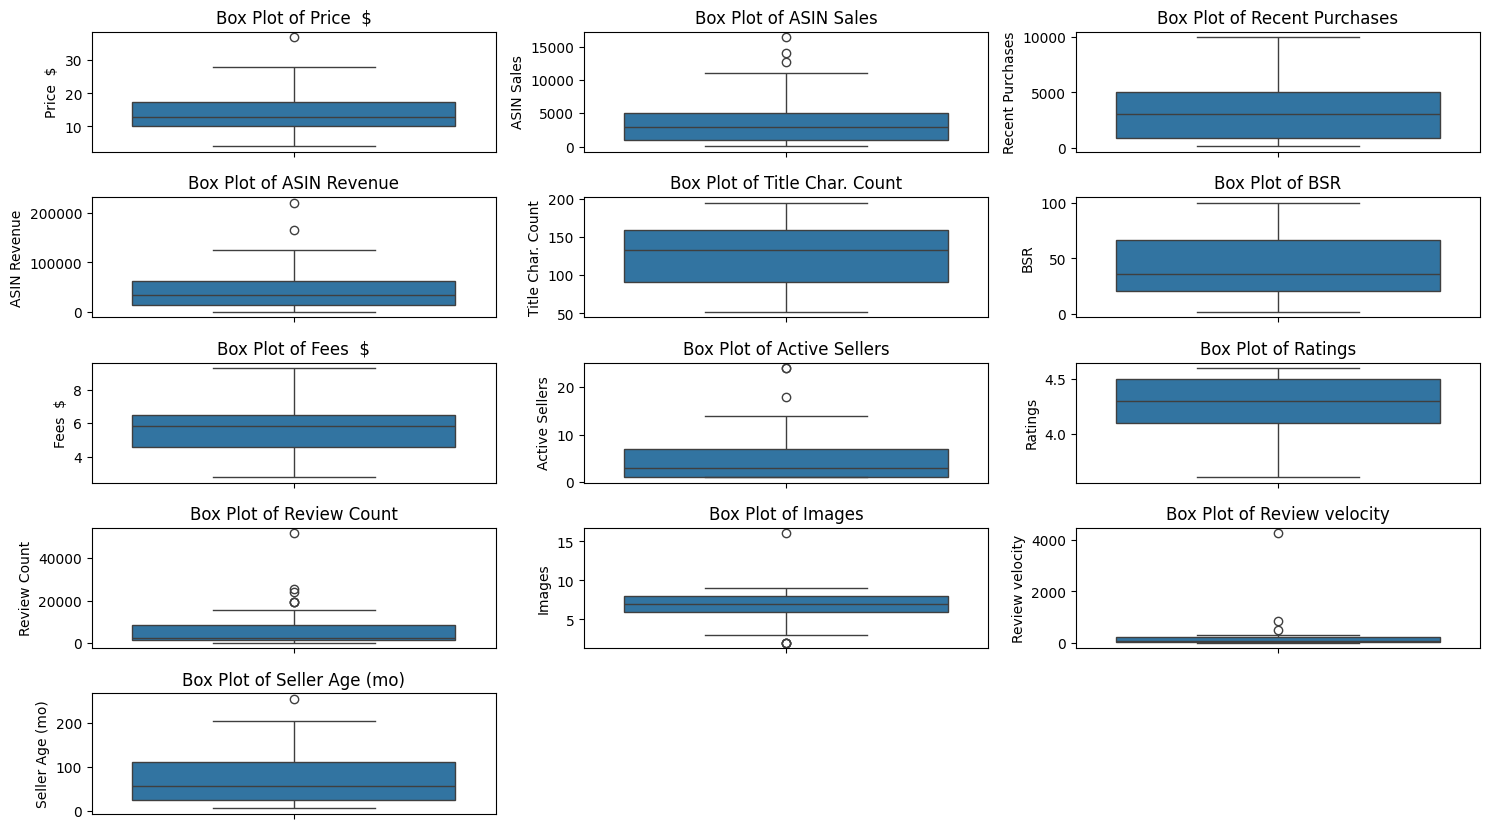

In [ ]:
# Select only numerical columns (float64 and int64)
numerical_cols = filtered_df.select_dtypes(include=np.number).columns

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=filtered_df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

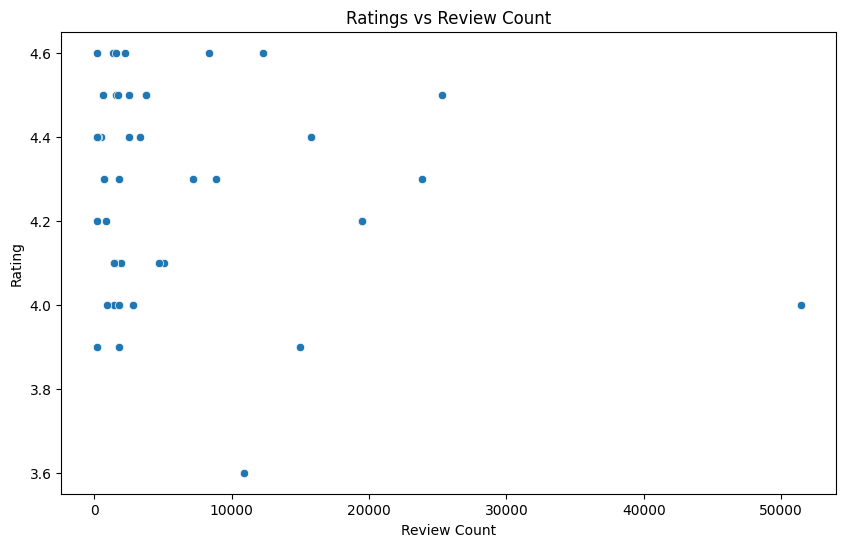

In [ ]:
# Scatter plot of Ratings vs Review Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Review Count', y='Ratings')
plt.title('Ratings vs Review Count')
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.show()

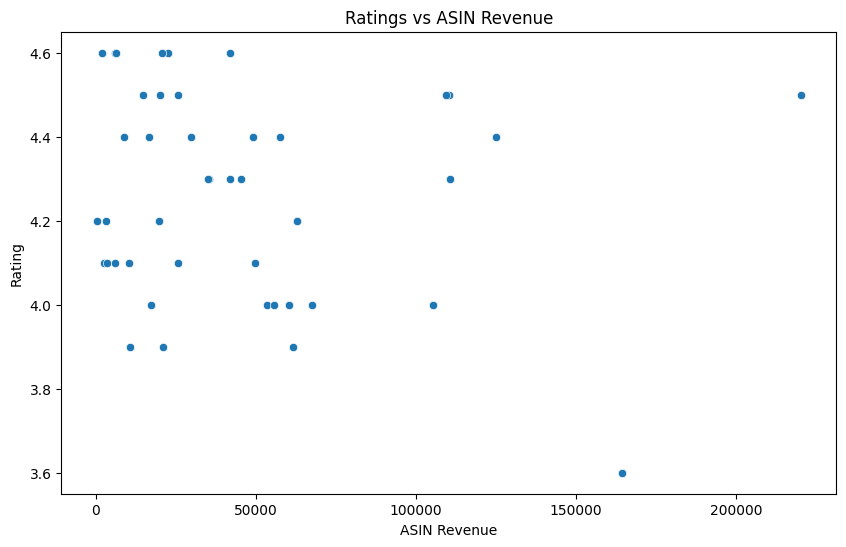

In [ ]:
# Scatter plot of Ratings vs ASIN Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='ASIN Revenue', y='Ratings')
plt.title('Ratings vs ASIN Revenue')
plt.xlabel('ASIN Revenue')
plt.ylabel('Rating')
plt.show()

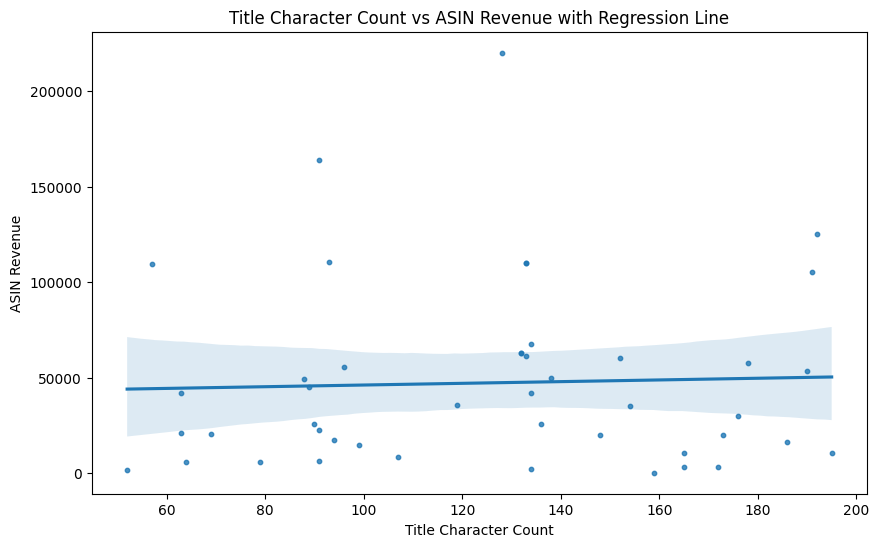

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=filtered_df, x='Title Char. Count', y='ASIN Revenue', scatter_kws={'s':10})
plt.title('Title Character Count vs ASIN Revenue with Regression Line')
plt.xlabel('Title Character Count')
plt.ylabel('ASIN Revenue')
plt.show()

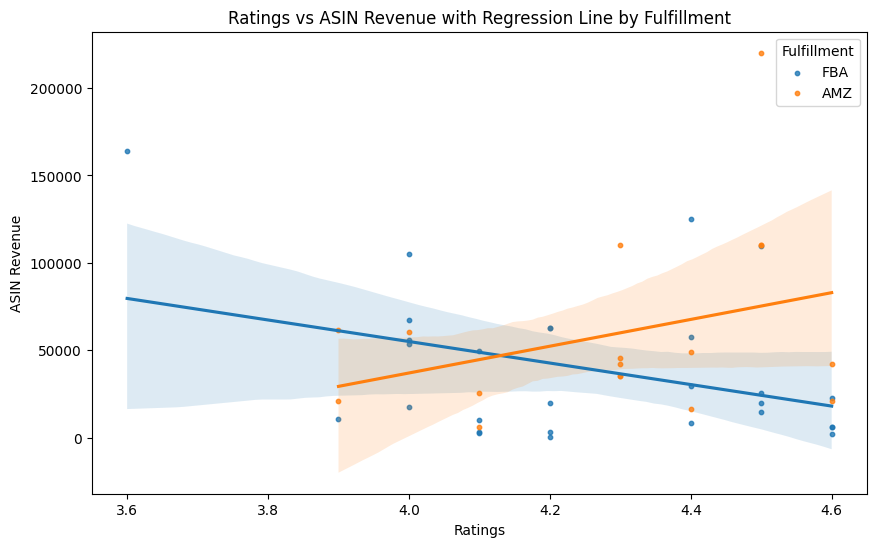

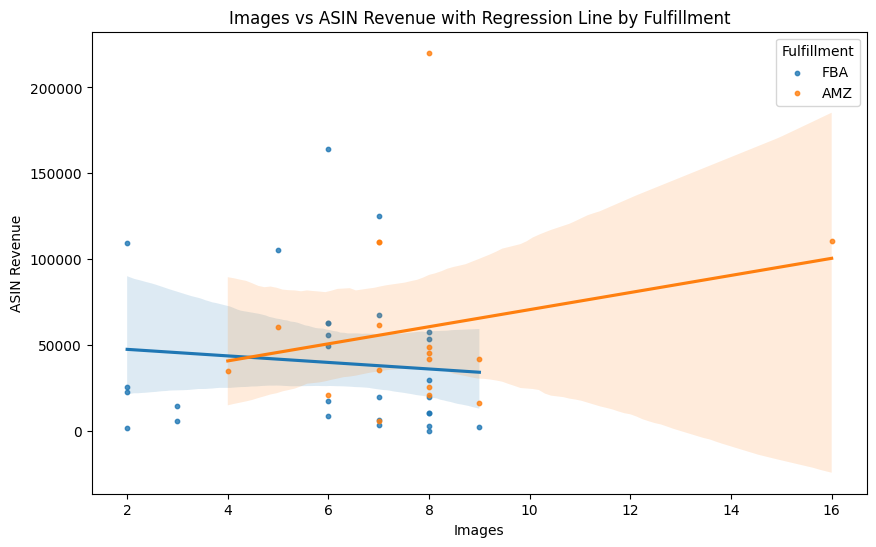

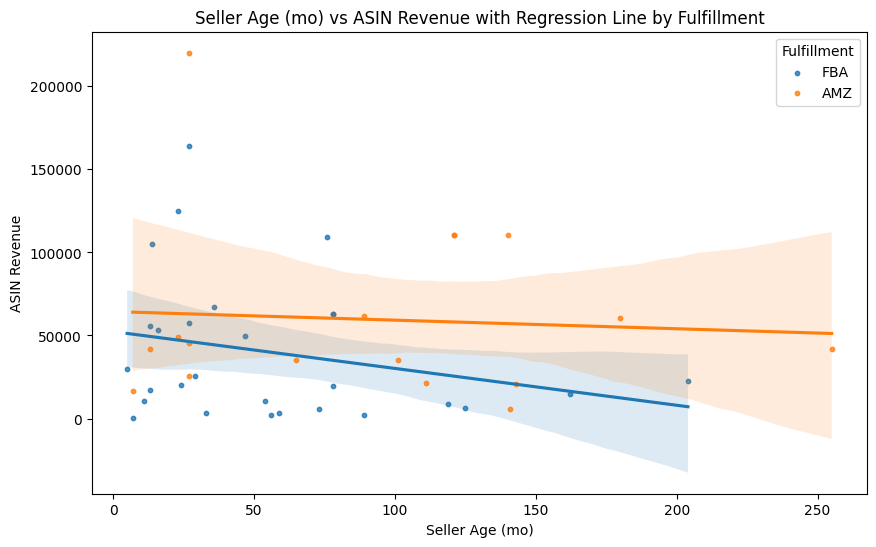

In [ ]:
# Define the x-axis variables
x_vars = ['Ratings', 'Images', 'Seller Age (mo)']
y_var = 'ASIN Revenue'
legend_var = 'Fulfillment'

# Create a loop to generate scatter plots with regression lines for each x-variable and fulfillment type
for x_var in x_vars:
    plt.figure(figsize=(10, 6))
    for fulfillment_type in filtered_df[legend_var].unique():
        subset_df = filtered_df[filtered_df[legend_var] == fulfillment_type]
        sns.regplot(data=subset_df, x=x_var, y=y_var, scatter_kws={'s':10}, label=fulfillment_type)

    plt.title(f'{x_var} vs {y_var} with Regression Line by {legend_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend(title=legend_var)
    plt.show()